## 1.0 SIMPLE WAYS OF PROFILING Python CODE

in order to find bottlenecks




In [6]:
import numpy as np

import numba as nb

import time

import memory_profiler
import line_profiler

## 1.1 function timing with %timeit on a real example
##### timeit: Measure execution time of small code snippets

In [2]:
text="""Introduction For an introduction to firewalls, please see Firewall.
UFW - Uncomplicated Firewall The default firewall configuration tool for Ubuntu is ufw. Developed to ease iptables firewall configuration, ufw provides a user friendly way to create an IPv4 or IPv6 host-based firewall. By default UFW is disabled.
Gufw is a GUI that is available as a frontend.
Basic Syntax and Examples
Default rules are fine for the average home user
When you turn UFW on, it uses a default set of rules (profile) that should be fine for the average home user. That's at least the goal of the Ubuntu developers. In short, all 'incoming' is being denied, with some exceptions to make things easier for home users.
Enable and Disable
Enable UFW
To turn UFW on with the default set of rules:
sudo ufw enable
To check the status of UFW:
sudo ufw status verbose
The output should be like this:
Allow and Deny (specific rules)
Allow
sudo ufw allow <port>/<optional: protocol>
example: To allow incoming tcp and udp packet on port 53
sudo ufw allow 53
example: To allow incoming tcp packets on port 53
sudo ufw allow 53/tcp
example: To allow incoming udp packets on port 53
sudo ufw allow 53/udp
Deny
sudo ufw deny <port>/<optional: protocol>
example: To deny tcp and udp packets on port 53
sudo ufw deny 53
example: To deny incoming tcp packets on port 53
sudo ufw deny 53/tcp
example: To deny incoming udp packets on port 53
sudo ufw deny 53/udp
and must be able to communicate the limitations of data to try to
prevent misuse of data or analytical results.
The skills and capabilities noted above are just the tip of the iceberg,
of course, but notice what a wide range is represented here.
While a keen understanding of numbers and mathematics is important,
particularly for data analysis, the data scientist also needs to
have excellent communication skills, be a great systems thinker,
have a good eye for visual displays, and be highly capable of thinking
critically about how data will be used to make decisions and
affect people’s lives. Of course there are very few people who are
good at all of these things, so some of the people interested in data
will specialize in one area, while others will become experts in another
area. This highlights the importance of teamwork, as well.
In this Introduction to Data Science eBook, a series of data problems
of increasing complexity is used to illustrate the skills and capabilities
needed by data scientists. The open source data analysis
program known as "R" and its graphical user interface companion
"R-Studio" are used to work with real data examples to illustrate
both the challenges of data science and some of the techniques
used to address those challenges. To the greatest extent possible,
real datasets reflecting important contemporary issues are used as
the basis of the discussions.
No one book can cover the wide range of activities and capabilities
involved in a field as diverse and broad as data science. Throughout
the book references to other guides and resources provide the
interested reader with access to additional information. In the open
source spirit of "R" and "R Studio" these are, wherever possible,
web-based and free. In fact, one of guides that appears most fre-
Here we have started to use two binary digits - two bits - to create
a "code book" for four different messages that we might want to
transmit to our friend about her dinner party. If we were certain
that we would not attend, we would send her the message 0 0. If
we definitely planned to attend we would send her 1 1. But we
have two additional possibilities, "Maybe" which is represented by
0 1, and "Probably" which is represented by 1 0. It is interesting to
compare our original yes/no message of one bit with this new
four-option message with two bits. In fact, every time you add a
new bit you double the number of possible messages you can send.
So three bits would give eight options and four bits would give 16
options. How many options would there be for five bits?
When we get up to eight bits - which provides 256 different combinations
- we finally have something of a reasonably useful size to
work with. Eight bits is commonly referred to as a "byte" - this
term probably started out as a play on words with the word bit.
(Try looking up the word "nybble" online!) A byte offers enough different
"""

In [3]:
## DEFINE 2 kind of similar FUNCTIONS

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



def removesw(words):
    wordsFiltered = []
    for w in words:
        if w not in stopwords.words('english'):
            wordsFiltered.append(w)
    return wordsFiltered
    

sw=stopwords.words('english')
def removesw2(words):
    wordsFiltered = []
    for w in words:
        if w not in sw:
            wordsFiltered.append(w)
    return wordsFiltered

In [5]:
words = word_tokenize(text)



In [6]:
%timeit -n 30 removesw(words)

%timeit -n 30 removesw2(words)


85 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 30 loops each)
1.52 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 30 loops each)


#### what happened here?
In both functions we loop the stop word list at every word. But in this particular case
NLTK reads it from a file (DISK I/O). it does that for.every.single.word. *facepalm*

    for w in words:
        if w not in stopwords.words('english'):


On the second function the DISK I/O is performed once. Then the list is in memory. hence.. big diff in speed.

In [ ]:
#Plenty more involved python profilers: an example is below. install snakeviz with pip
#Run the code below.SnakeViz opens an interactive web page for visualizing the call stack. 

In [ ]:
%load_ext snakeviz

In [ ]:
%%snakeviz
removesw2(words)

## 1.2 decorators

A decorator is a higher-order function, i.e. one that takes as its argument a function, 
and returns another function. In the case of a decorator, 
that returned function is usually just the original function augmented with some extra functionality. 




In [7]:
#As you can see, starwrap is a function, that takes a function as its input, 
#and it returns the same input while also modifying it.


def starwrap(fn):
    def wrapped():
        return "*****" + fn() + "*****"
    return wrapped



In [8]:

#Let’s use it to decorate (or wrap) another function:

@starwrap
def hello():
    return "hello GDSP"


hello()


#Putting a @decorator line in front of the function definition is the same as defining the function first 
#and then running through the decorator. 
#Using the @ syntax is just syntactic sugar, 
#and a shortcut for this commonly used pattern. 

'*****hello GDSP*****'

## 2.0 THE NEED FOR SPEED 

![NFS](NFS.png "NFS")

(not the game!)
#### Higher level languages such as Python are optimized for humans
#### This means that the programmer can leave many details to the runtime environment

    specifying variable types
    memory allocation/deallocation, etc.





#### The upside is that, compared to low-level languages, Python is typically faster to write, less error prone and easier to debug
#### The downside is that Python is harder to optimize  — that is, turn into fast machine code — than languages like C or Fortran

In [9]:
#### Indeed, the standard implementation of Python (called CPython) cannot match the speed 
#### of compiled languages such as C or Fortran

##### BUT WHY?

#### Dynamic Typing in python

In [10]:
# if a and b are numbers then a+b requires addition
a, b = 10, 10
a + b

20

In [11]:
#If a and b are strings, then a + b requires string concatenation
a, b = 'BiG', ' DATA'
a + b

'BiG DATA'

In [12]:
#If a and b are lists, then a + b requires list concatenation
a, b = ['foo'], ['bar']
a + b

['foo', 'bar']

(We say that the operator + is overloaded — its action depends on the type of the objects on which it acts)

As a result, Python must check the type of the objects and then call the correct operation

#### This involves substantial overheads  = SLOWER CODE in our case

In [13]:
# Plenty of ways to get better performance.
# I am going to show some of them.

#### NUMBA
Numba gives you the power to speed up your applications with high performance functions 
written directly in Python. With a few annotations, array-oriented and math-heavy Python code 
can be just-in-time compiled to native machine instructions, 
similar in performance to C, C++ and Fortran, 
without having to switch languages or Python interpreters.

Numba works by generating optimized machine code using the LLVM compiler infrastructure 
at import time, runtime, or statically (using the included pycc tool). 
Numba supports compilation of Python to run on either CPU or GPU hardware, 
and is designed to integrate with the Python scientific software stack.

In [ ]:
### EXAMPLE 1 : Quicksort of Array

In [14]:
size = 100000
thelist = list(np.random.uniform(-1, 1, size))


In [4]:
def quicksortA(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksortA(left) + middle + quicksortA(right)

In [7]:
@nb.autojit
def quicksortB(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksortB(left) + middle + quicksortB(right)


# same function but USED a numba decorator


In [17]:

%timeit (quicksortA(thelist))


455 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
thelist = list(np.random.uniform(-1, 1, size)) 
%timeit quicksortB(thelist)

129 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# numba jit function is 3 times faster... with no particular hints!

In [15]:
import pandas as pd
#import numpy as np
#qdf = pd.DataFrame(columns=['num','plain','jit'])
#for i in range(500,1000000,1000):
#    thelist = list(np.random.uniform(-1, 1, i))
#    pl = %timeit -n 1 -o quicksortA(thelist)
#    jt = %timeit -n 1 -o quicksortB(thelist)
#
#    qdf = qdf.append({'num': i,'plain':pl.best,'jit':jt.best}, ignore_index=True)
qdf = pd.read_csv('quicklistresult.csv')


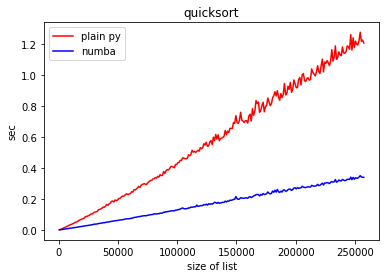

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

plt.plot( qdf.num,qdf.plain, 'r',label='plain py')
plt.plot (qdf.num,qdf.jit, 'b',label='numba')
plt.title('quicksort')
plt.legend()
plt.xlabel('size of list')
plt.ylabel('sec')
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()

In [20]:
# EXAMPLE 2: bubblesort / autojit and jit with types.

In [21]:
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [22]:
@nb.autojit
def bubblesort_autojit(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [22]:
@nb.jit("void(f4[:])")
def bubblesort_jit(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp
                
                
#here we provide a type hint

In [24]:
original = np.arange(0.0, 10.0, 0.01, dtype='f4')
shuffled = original.copy()
np.random.shuffle(shuffled)



In [28]:
%timeit -n 10 bubblesort(shuffled)

117 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
np.random.shuffle(shuffled)
%timeit -n 10 bubblesort_jit(shuffled)

429 µs ± 49.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
np.random.shuffle(shuffled)
%timeit -n 10 bubblesort_autojit(shuffled)

378 µs ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# the difference is quite big! first case is in milliseconds but second and third in microseconds!!!

In [33]:
import numpy as np
bdf = pd.DataFrame(columns=['num','plain','jit'])
for i in range(1,1001,10):
    ifl= float(i)
    original = np.arange(ifl, dtype='f4')
    shuffled = original.copy()
    np.random.shuffle(shuffled)
    pl = %timeit -n 1 -o bubblesort(shuffled)
    np.random.shuffle(original)
    jt = %timeit -n 1 -o bubblesort_jit(shuffled)

    bdf = bdf.append({'num': i,'plain':pl.best,'jit':jt.best}, ignore_index=True)

The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
1.51 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 7.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1.64 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
35.3 µs ± 9.38 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 6.96 times longer than the fastest. This could mean that an intermediate result is being cached.
1.81 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
119 µs ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 5.21 times longer than the fastest. This could mean that an intermediate result is being cached.
2.15 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
254 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.00 times longer than the f

36.1 ms ± 8.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
111 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
38 ms ± 9.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
124 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.3 ms ± 9.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
119 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.4 ms ± 9.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
123 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
42.7 ms ± 9.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
128 µs ± 6.04 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.7 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
131 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
45.1 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
135 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
46.7 ms ± 11.7 ms per loop (mean ± std. dev.

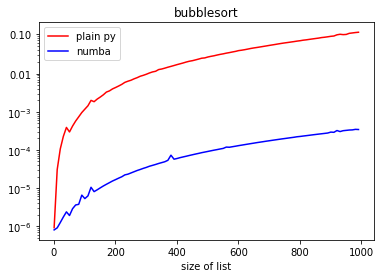

In [36]:
plt.gcf().clear() 
plt.plot( bdf.num,bdf.plain, 'r',label='plain py')
plt.plot (bdf.num,bdf.jit, 'b',label='numba')

plt.title('bubblesort')
plt.legend()
plt.xlabel('size of list')
#plt.ylabel('sec')
plt.yscale('logit')
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()

In [ ]:
# EXAMPLE 3 : SUM of Arrays

In [31]:
def sum_array(inp):
    I, J = inp.shape
    #nested loops ....this is not very efficient. 
    mysum = 0
    for i in range(I):
        for j in range(J):
            mysum += inp[i, j]
            
    return mysum

In [32]:

@nb.jit
def sum_arraynumba(inp):
    I, J = inp.shape
    
    mysum = 0
    for i in range(I):
        for j in range(J):
            mysum += inp[i, j]
            
    return mysum



In [33]:
arr = np.random.random((300, 300))
arr

array([[ 0.73902374,  0.88752845,  0.36337107, ...,  0.99514389,
         0.90578353,  0.00775502],
       [ 0.06287354,  0.23443922,  0.08178158, ...,  0.31238903,
         0.9401098 ,  0.92418352],
       [ 0.34536675,  0.71463288,  0.21995936, ...,  0.01725303,
         0.34061721,  0.87864223],
       ..., 
       [ 0.58626061,  0.25813693,  0.77721439, ...,  0.18639575,
         0.99188227,  0.87245313],
       [ 0.33250972,  0.84050984,  0.25197657, ...,  0.23473787,
         0.61525618,  0.63787339],
       [ 0.59829758,  0.8579884 ,  0.41361664, ...,  0.28210841,
         0.25606547,  0.37423582]])

In [34]:
plain = %timeit -o sum_array(arr)

16.8 ms ± 32.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
jitted = %timeit -o sum_arraynumba(arr)

91.9 µs ± 815 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
plain.best / jitted.best

184.12796729629017

In [ ]:
#the jit version is around 180 times faster!

In [ ]:
##LAST numba EXAMPLE: FRACTALS. MANDELBROT 

In [37]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np

%matplotlib inline
 
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0
    
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)
    
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower')

1.55 s ± 86.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


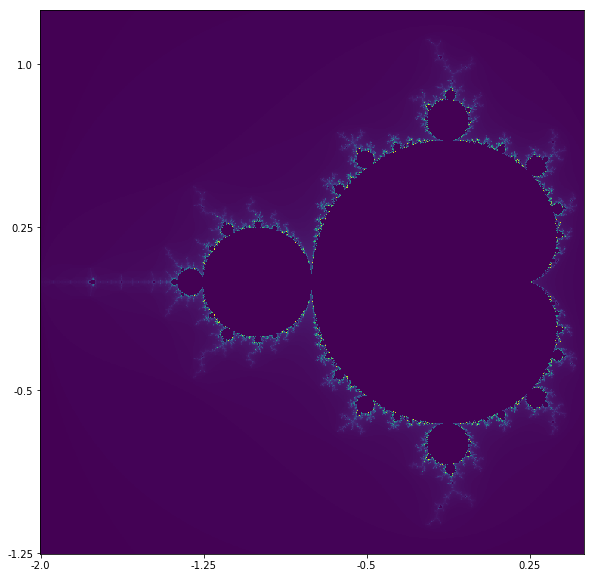

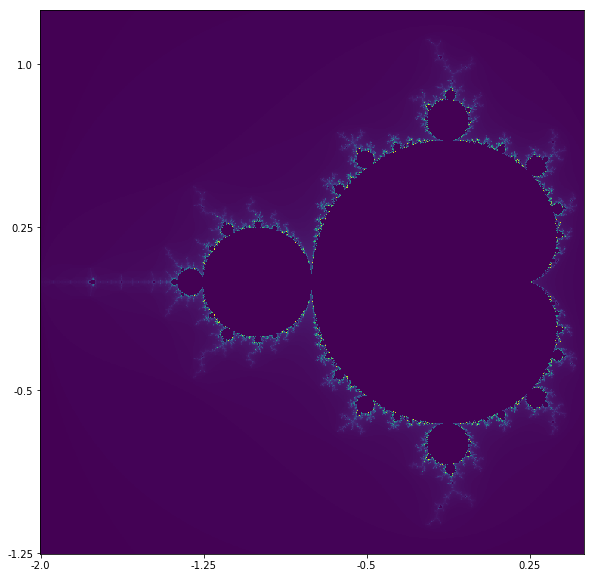

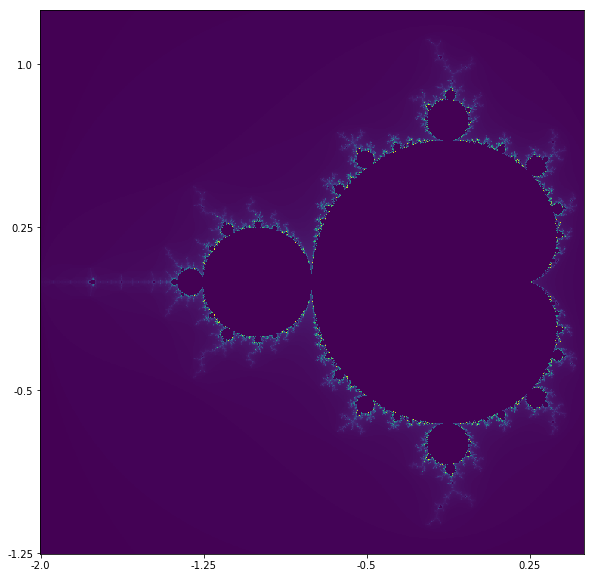

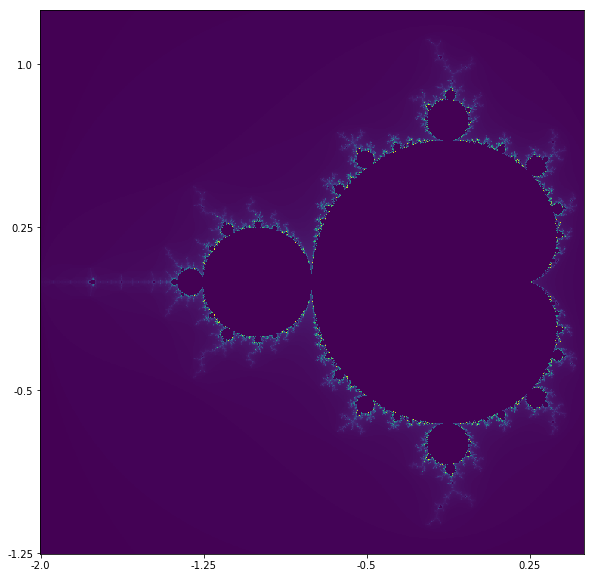

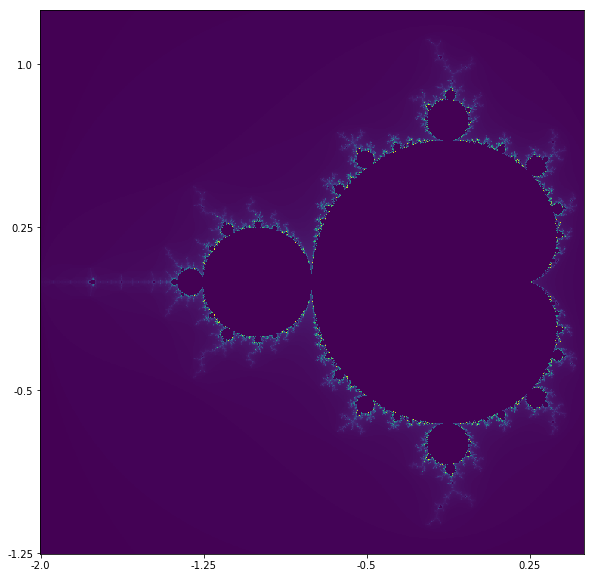

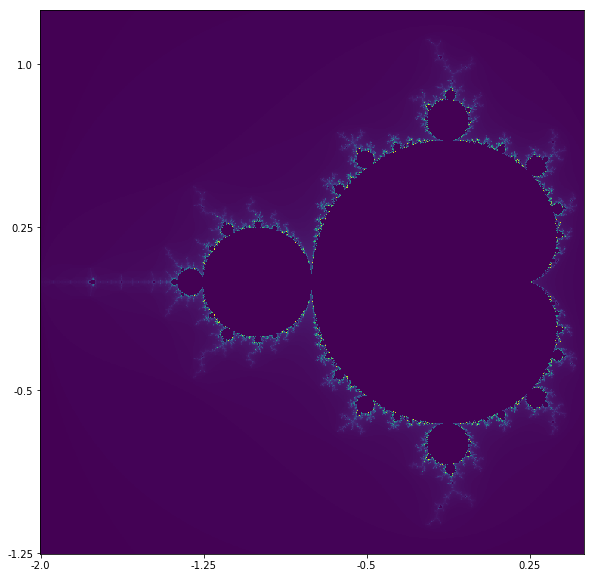

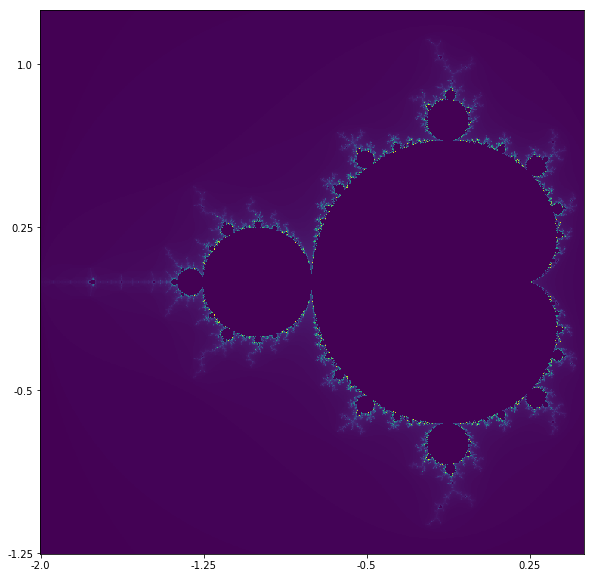

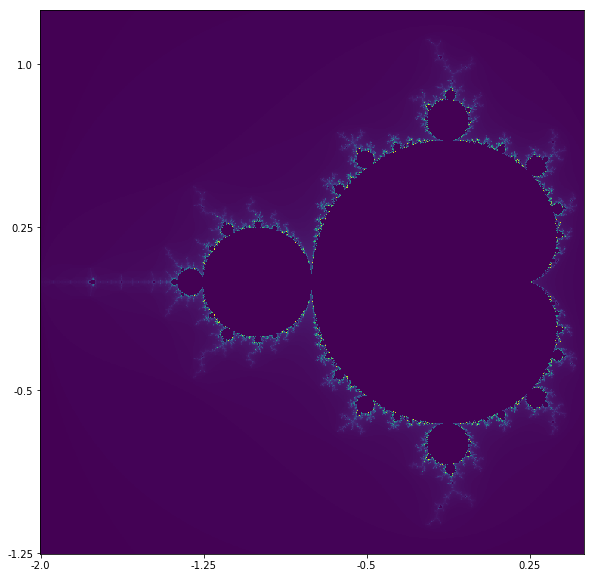

In [55]:
plainm= %timeit -o -n 1 mandelbrot_image(-2.0,0.5,-1.25,1.25)

### NOW LETS TRY TO OPTIMIZE THIS CODE

In [51]:
@nb.jit
def mandelbrotJIT(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

In [52]:
@nb.jit
def mandelbrot_setJIT(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrotJIT(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [53]:
def mandelbrot_imageJIT(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_setJIT(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower')

469 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


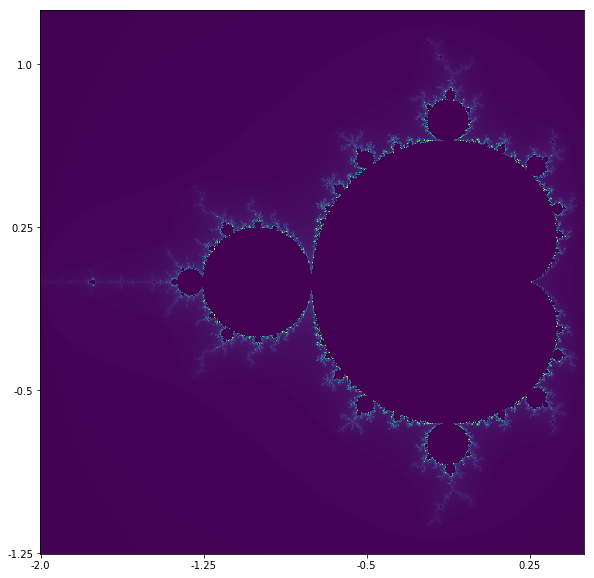

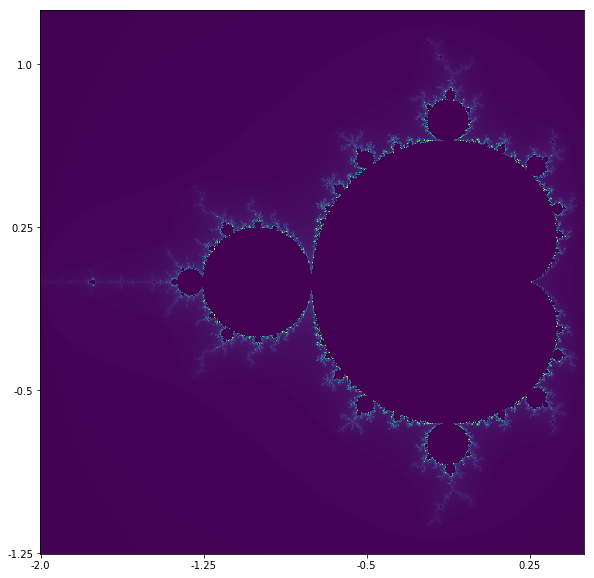

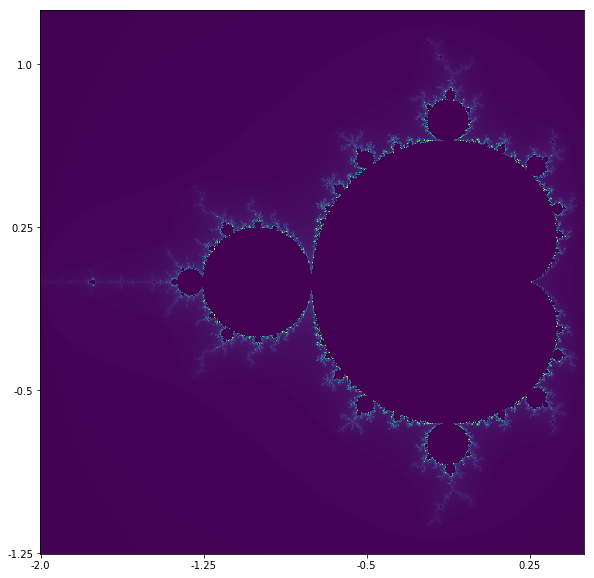

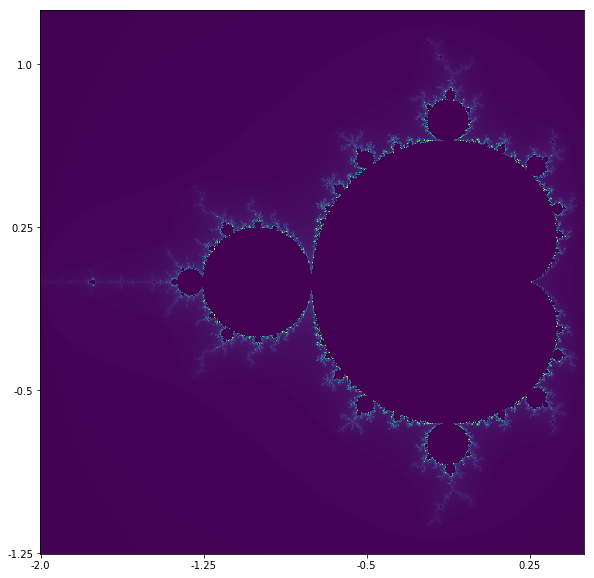

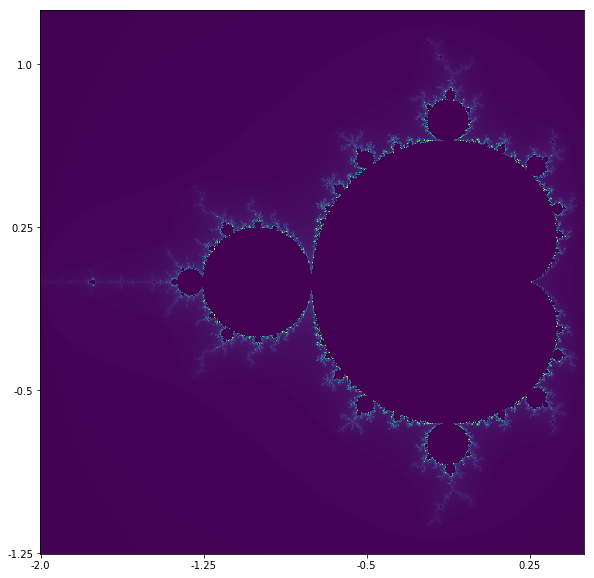

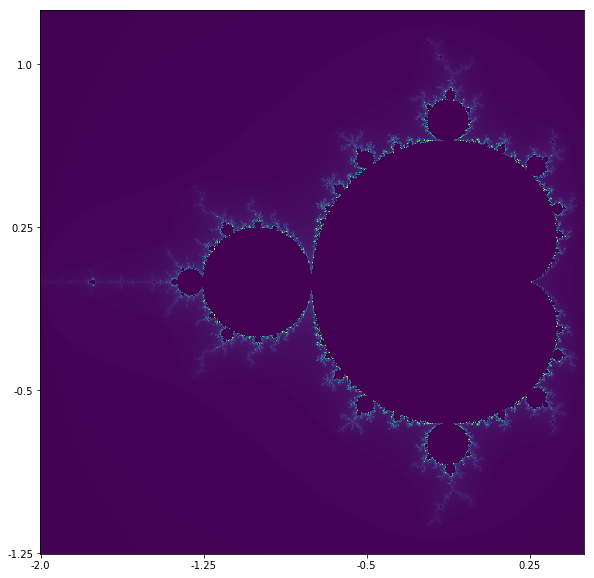

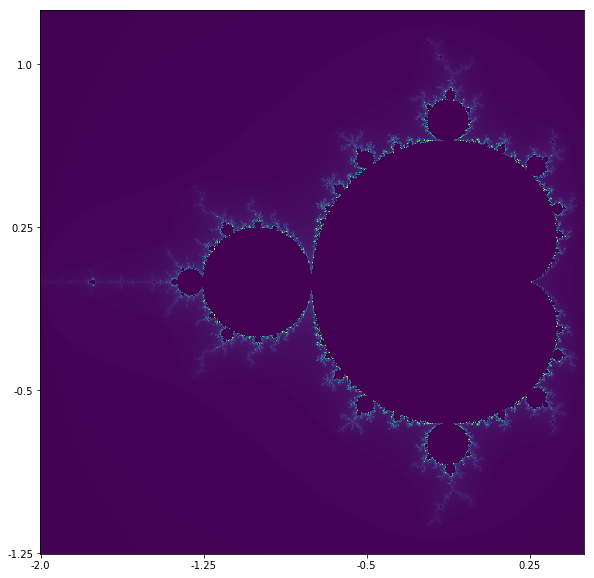

In [72]:
jittedm = %timeit -o -n 1 mandelbrot_imageJIT(-2.0,0.5,-1.25,1.25);

In [ ]:
#So by just adding autojit without any type hints we get a big improvement. 
# what will happen if we add type hints and the ability to use more than one core in the CPU?

In [57]:
from numba import jit, vectorize, guvectorize, float64, complex64, int32, float32

@jit(int32(complex64, int32))
def mandelbrot(c,maxiter):
    nreal = 0
    real = 0
    imag = 0
    for n in range(maxiter):
        nreal = real*real - imag*imag + c.real
        imag = 2* real*imag + c.imag
        real = nreal;
        if real * real + imag * imag > 4.0:
            return n
    return 0

@guvectorize([(complex64[:], int32[:], int32[:])], '(n),()->(n)',target='parallel')
def mandelbrot_numpy(c, maxit, output):
    maxiter = maxit[0]
    for i in range(c.shape[0]):
        output[i] = mandelbrot(c[i],maxiter)
        
def mandelbrot_set2(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype=np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype=np.float32)
    c = r1 + r2[:,None]*1j
    n3 = mandelbrot_numpy(c,maxiter)
    return (r1,r2,n3.T) 

In [31]:

#convenience function for creating fractal animations. ignore!
image_counter = 0

def save_image(fig):
    global image_counter
    if (image_counter<10):
        filename = "mandel_00%d.png" % image_counter
    elif (image_counter>9)&(image_counter<100):
        filename = "mandel_0%d.png" % image_counter
    else:
        filename = "mandel_%d.png" % image_counter
        
    image_counter += 1
    fig.savefig(filename)



In [58]:
def mandelbrot_imageGU(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set2(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
   
    ax.imshow(z.T,origin='lower')
    
    #save_image(fig)
    

113 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


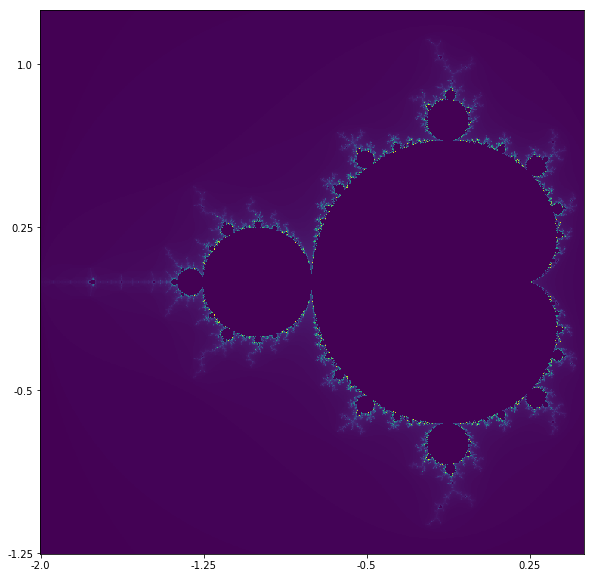

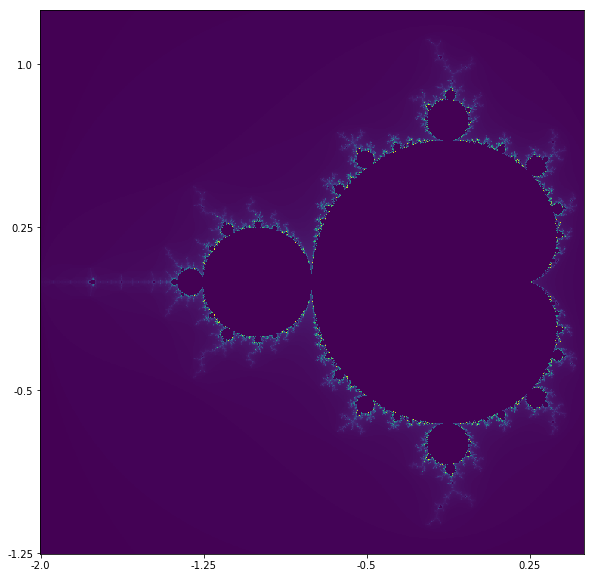

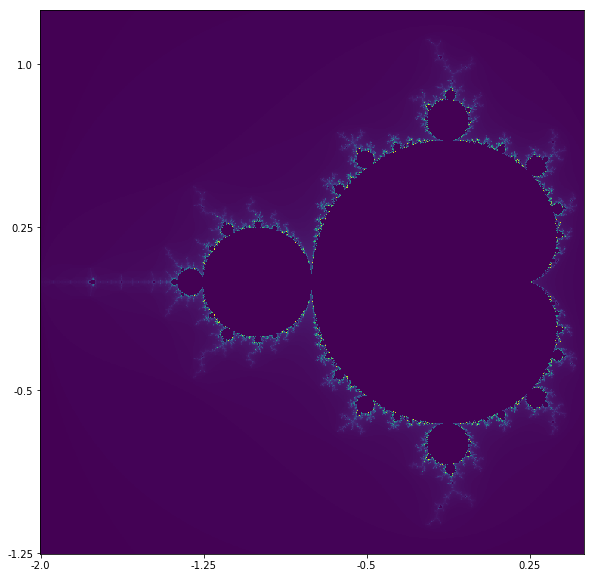

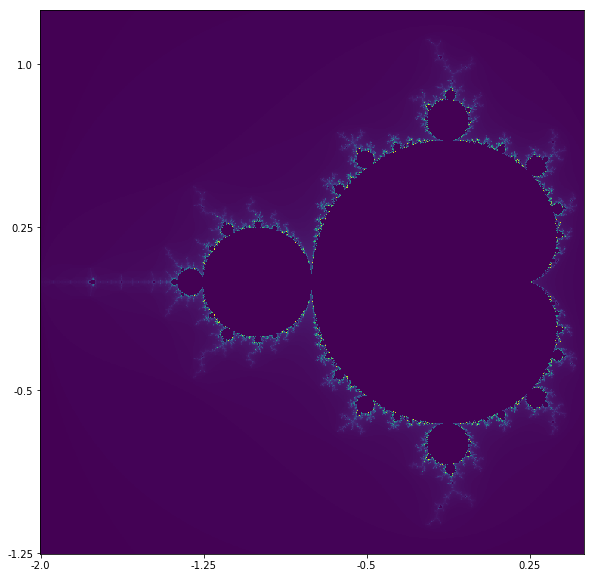

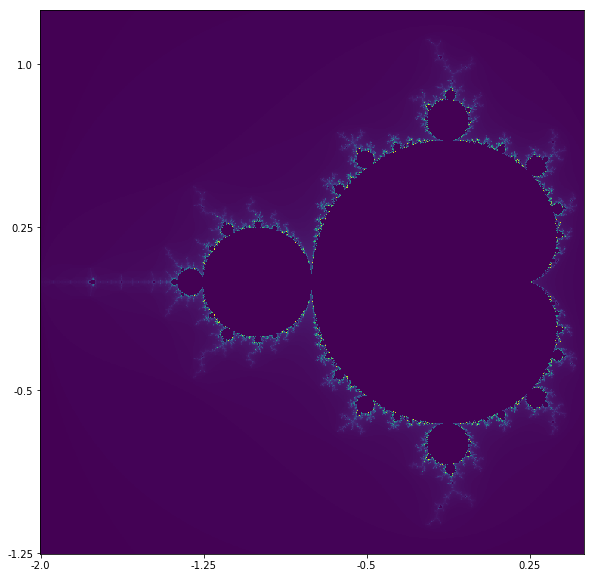

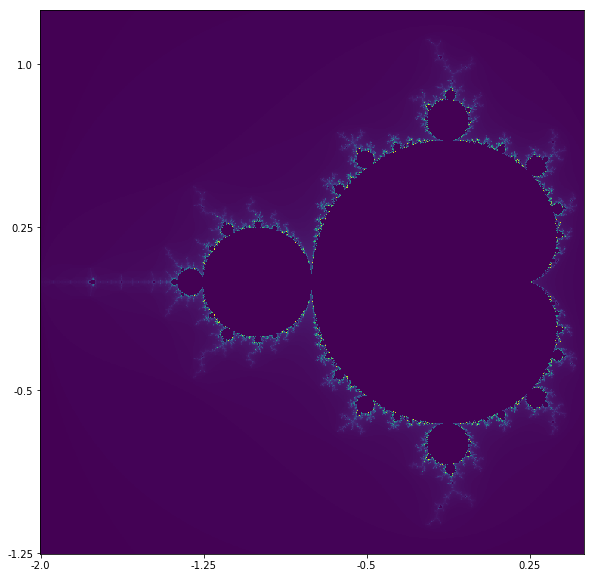

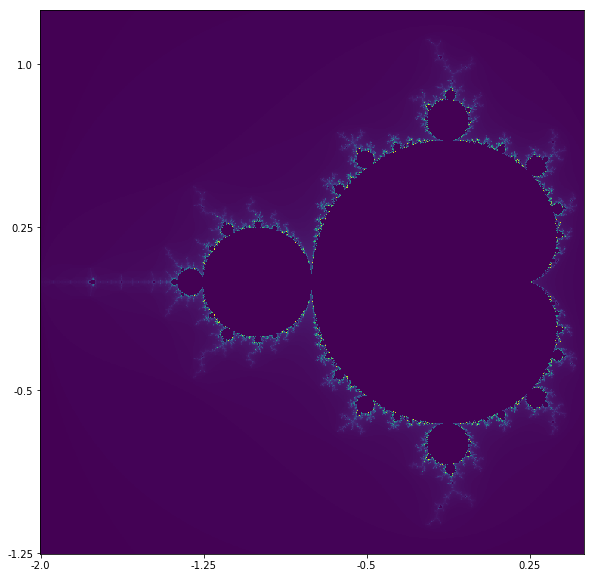

In [73]:
gittedGUm = %timeit -o -n 1 mandelbrot_imageGU(-2.0,0.5,-1.25,1.25)

In [97]:
plainm.best / jittedm.best

29.745420736799815

In [99]:
plainm.best / gittedGUm.best

149.4561147943795

the accelerated function runs ~ 150 times faster than the normal one. This means that with the accellareted one instead of calculate one frame in the same time we can do this:
[click for animation](hot-output.gif)

## 3.0 Memoization
Memoization is a way of caching the results of a function call. 
If a function is memoized, evaluating it is simply a matter of looking up the result 
you got the first time the function was called with those parameters. 
This is recorded in the memoization cache. If the lookup fails, that’s because the function has never been called with those parameters. 
Only then do you need to run the function itself.



In [44]:
# fibionnaci calculation. its recursive 
#reminder... numba cannot handle recursion


def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)


In [45]:
from functools import lru_cache


#A quick word of warning on the naive caching implementation in our memoize decorator: 
#In this example the cache size is unbounded, which means the cache can grow at will. 
#This is usually not a good idea because it can lead to memory exhaustion bugs in your programs.
    
#With any kind of caching that is used
#it makes sense to put a limit on the amount of data that’s kept in the cache at the same time. 
#This is typically achieved either by having a hard limit on the cache size or 
#by defining an expiration policy that evicts old items from the cache at some point.

@lru_cache(maxsize=None)
def fibl(n):
    if n < 2:
        return n
    return fibl(n-1) + fibl(n-2)

In [46]:
%timeit fib(25)

28.8 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
fibl.cache_clear
%timeit fibl(25)


109 ns ± 2.79 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [48]:
fibl.cache_info()


CacheInfo(hits=81111133, misses=26, maxsize=None, currsize=26)